In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df = df.loc[:, df.columns.intersection(['SEVERITYCODE','COLLISIONTYPE','UNDERINFL', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING'])]


In [7]:
df.head()

,SEVERITYCODE,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Angles,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Sideswipe,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Parked Car,NaN,0,Overcast,Dry,Daylight,NaN
3,1,Other,NaN,N,Clear,Dry,Daylight,NaN
4,2,Angles,NaN,0,Raining,Wet,Daylight,NaN


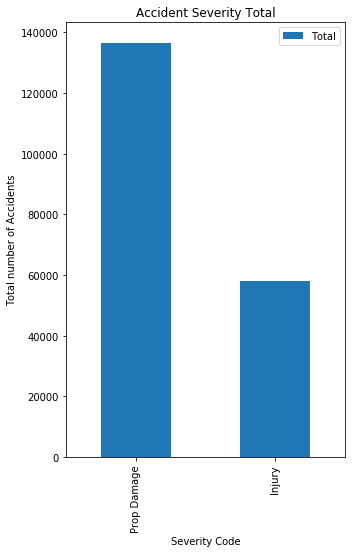

In [9]:
sc_total = {'SC': ['Prop Damage','Injury'], 'Total': [df[df['SEVERITYCODE'] == 1].shape[0], df[df['SEVERITYCODE'] == 2].shape[0]]}
sc_df = pd.DataFrame(data=sc_total)
sc_df.plot(kind='bar', x='SC', y='Total', figsize=(5, 8))

plt.xlabel('Severity Code') 
plt.ylabel('Total number of Accidents')
plt.title('Accident Severity Total') 

plt.show()

In [10]:
inatt = df['INATTENTIONIND'].isna().sum() / df.shape[0] * 100
inatt = round(inatt, 2)
print ('In the INATTENTIONIND attribute,',inatt,'% of the values are unknown.')

In the INATTENTIONIND attribute, 84.69 % of the values are unknown.


In [11]:
speeding = df['SPEEDING'].isna().sum() / df.shape[0] * 100
speeding = round(speeding, 2)
print ('In the SPEEDING attribute,',speeding,'% of the values are unknown.')

In the SPEEDING attribute, 95.21 % of the values are unknown.


In [12]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['0'],'N')
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'],'Y')

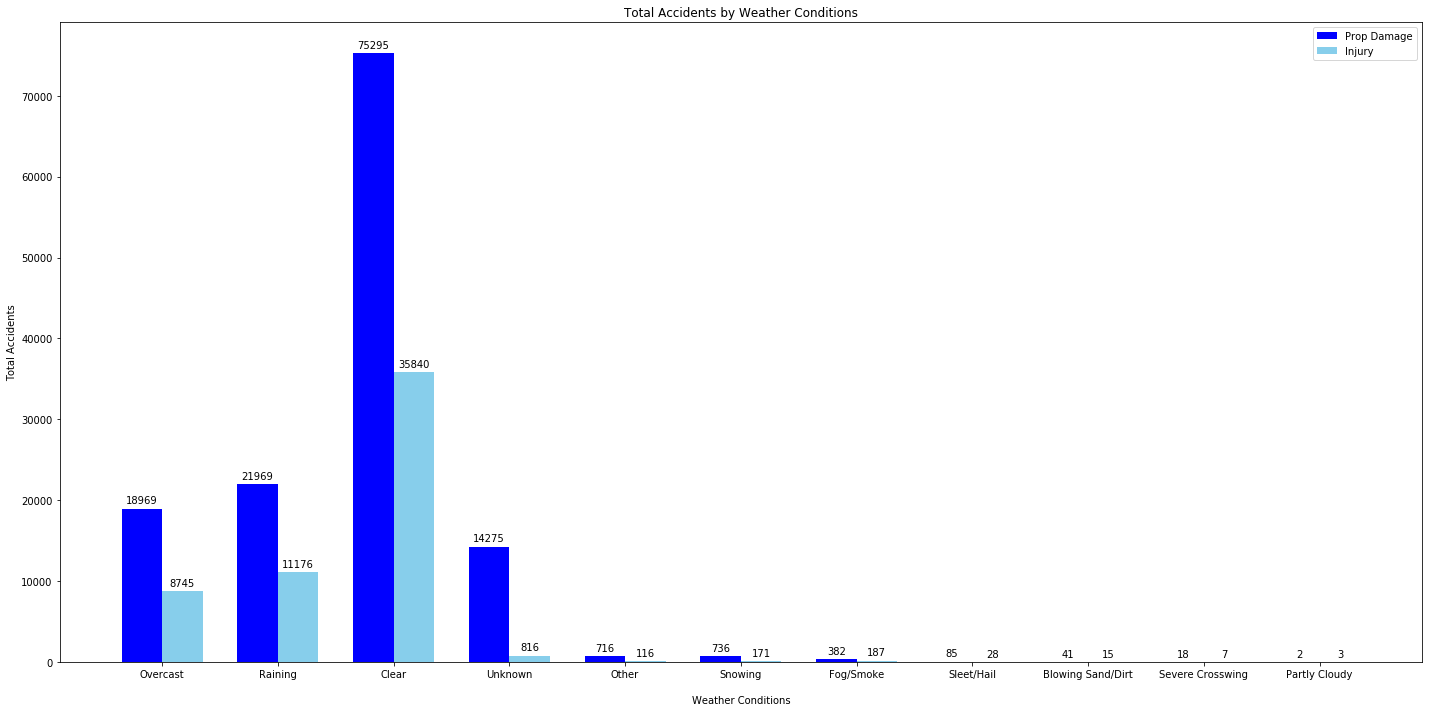

In [13]:
overcast = df.loc[df['WEATHER'] == 'Overcast', 'SEVERITYCODE'].value_counts()
raining = df.loc[df['WEATHER'] == 'Raining', 'SEVERITYCODE'].value_counts()
clear = df.loc[df['WEATHER'] == 'Clear', 'SEVERITYCODE'].value_counts()
unknown = df.loc[df['WEATHER'] == 'Unknown', 'SEVERITYCODE'].value_counts()
other = df.loc[df['WEATHER'] == 'Other', 'SEVERITYCODE'].value_counts()
snowing = df.loc[df['WEATHER'] == 'Snowing', 'SEVERITYCODE'].value_counts()
fog = df.loc[df['WEATHER'] == 'Fog/Smog/Smoke', 'SEVERITYCODE'].value_counts()
hail = df.loc[df['WEATHER'] == 'Sleet/Hail/Freezing Rain', 'SEVERITYCODE'].value_counts()
sand = df.loc[df['WEATHER'] == 'Blowing Sand/Dirt', 'SEVERITYCODE'].value_counts()
wind = df.loc[df['WEATHER'] == 'Severe Crosswind', 'SEVERITYCODE'].value_counts()
cloud = df.loc[df['WEATHER'] == 'Partly Cloudy', 'SEVERITYCODE'].value_counts()

weather_names = ['Overcast','Raining','Clear','Unknown','Other','Snowing','Fog/Smoke', 'Sleet/Hail', 
                   'Blowing Sand/Dirt', 'Severe Crosswing', 'Partly Cloudy']

labels = weather_names
weather_1 = [overcast[1],raining[1],clear[1],unknown[1],other[1],snowing[1],fog[1],hail[1],sand[1],wind[1],cloud[1]]
weather_2 = [overcast[2],raining[2],clear[2],unknown[2],other[2],snowing[2],fog[2],hail[2],sand[2],wind[2],cloud[2]]

x = np.arange(len(labels)) 
width = 0.35 

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, weather_1, width, color='Blue',label='Prop Damage')
rects2 = ax.bar(x + width/2, weather_2, width, color='SkyBlue',label='Injury')


ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nWeather Conditions')
ax.set_title('Total Accidents by Weather Conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

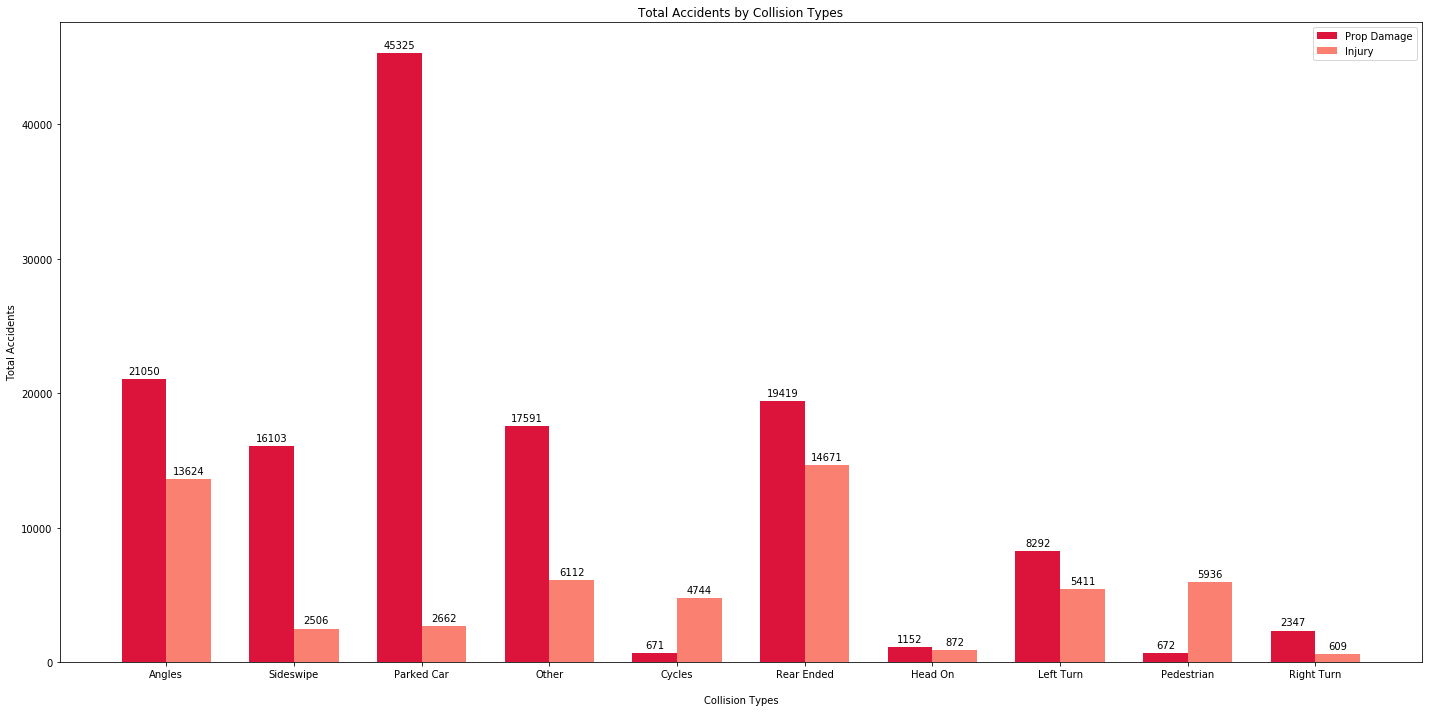

In [14]:
angles = df.loc[df['COLLISIONTYPE'] == 'Angles', 'SEVERITYCODE'].value_counts()
sswipe = df.loc[df['COLLISIONTYPE'] == 'Sideswipe', 'SEVERITYCODE'].value_counts()
pcar = df.loc[df['COLLISIONTYPE'] == 'Parked Car', 'SEVERITYCODE'].value_counts()
other1 = df.loc[df['COLLISIONTYPE'] == 'Other', 'SEVERITYCODE'].value_counts()
cycles = df.loc[df['COLLISIONTYPE'] == 'Cycles', 'SEVERITYCODE'].value_counts()
rended = df.loc[df['COLLISIONTYPE'] == 'Rear Ended', 'SEVERITYCODE'].value_counts()
hon = df.loc[df['COLLISIONTYPE'] == 'Head On', 'SEVERITYCODE'].value_counts()
lturn = df.loc[df['COLLISIONTYPE'] == 'Left Turn', 'SEVERITYCODE'].value_counts()
pstrian = df.loc[df['COLLISIONTYPE'] == 'Pedestrian', 'SEVERITYCODE'].value_counts()
rturn = df.loc[df['COLLISIONTYPE'] == 'Right Turn', 'SEVERITYCODE'].value_counts()

collision_names = ['Angles','Sideswipe','Parked Car','Other','Cycles','Rear Ended', 'Head On', 
                   'Left Turn', 'Pedestrian', 'Right Turn']

labels = collision_names
collision_1 = [angles[1],sswipe[1],pcar[1],other1[1],cycles[1],rended[1],hon[1],lturn[1],pstrian[1],rturn[1]]
collision_2 = [angles[2],sswipe[2],pcar[2],other1[2],cycles[2],rended[2],hon[2],lturn[2],pstrian[2],rturn[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, collision_1, width, color='#DC143C',label='Prop Damage')
rects2 = ax.bar(x + width/2, collision_2, width, color='#FA8072',label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nCollision Types')
ax.set_title('Total Accidents by Collision Types')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

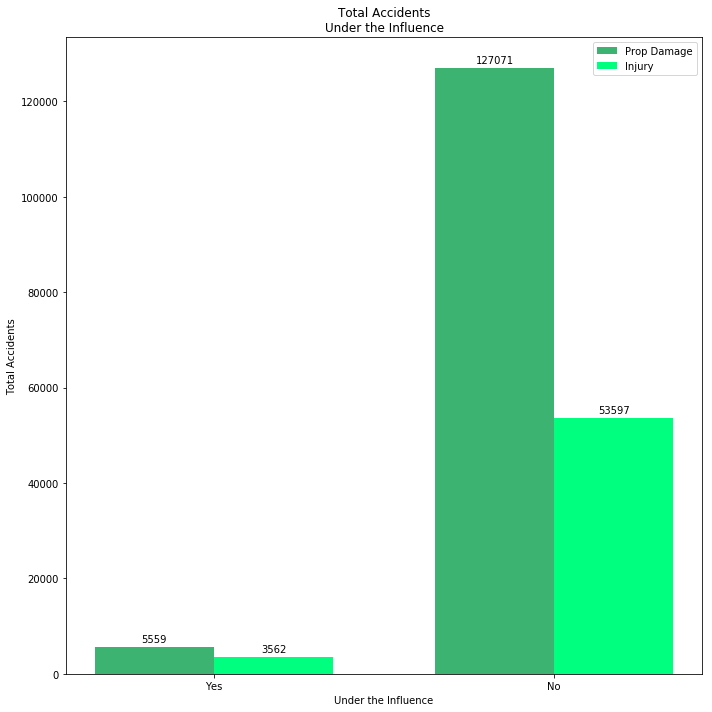

In [16]:
no = df.loc[df['UNDERINFL'] == 'N', 'SEVERITYCODE'].value_counts()
yes = df.loc[df['UNDERINFL'] == 'Y', 'SEVERITYCODE'].value_counts()

underinfl_names = ['Yes','No']

labels = underinfl_names
underinfl_1 = [yes[1],no[1]]
underinfl_2 = [yes[2],no[2]]

x = np.arange(len(labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, underinfl_1, width, color='#3CB371',label='Prop Damage')
rects2 = ax.bar(x + width/2, underinfl_2, width, color='#00FF7F',label='Injury')

ax.set_ylabel('Total Accidents')
ax.set_xlabel('Under the Influence')
ax.set_title('Total Accidents\nUnder the Influence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

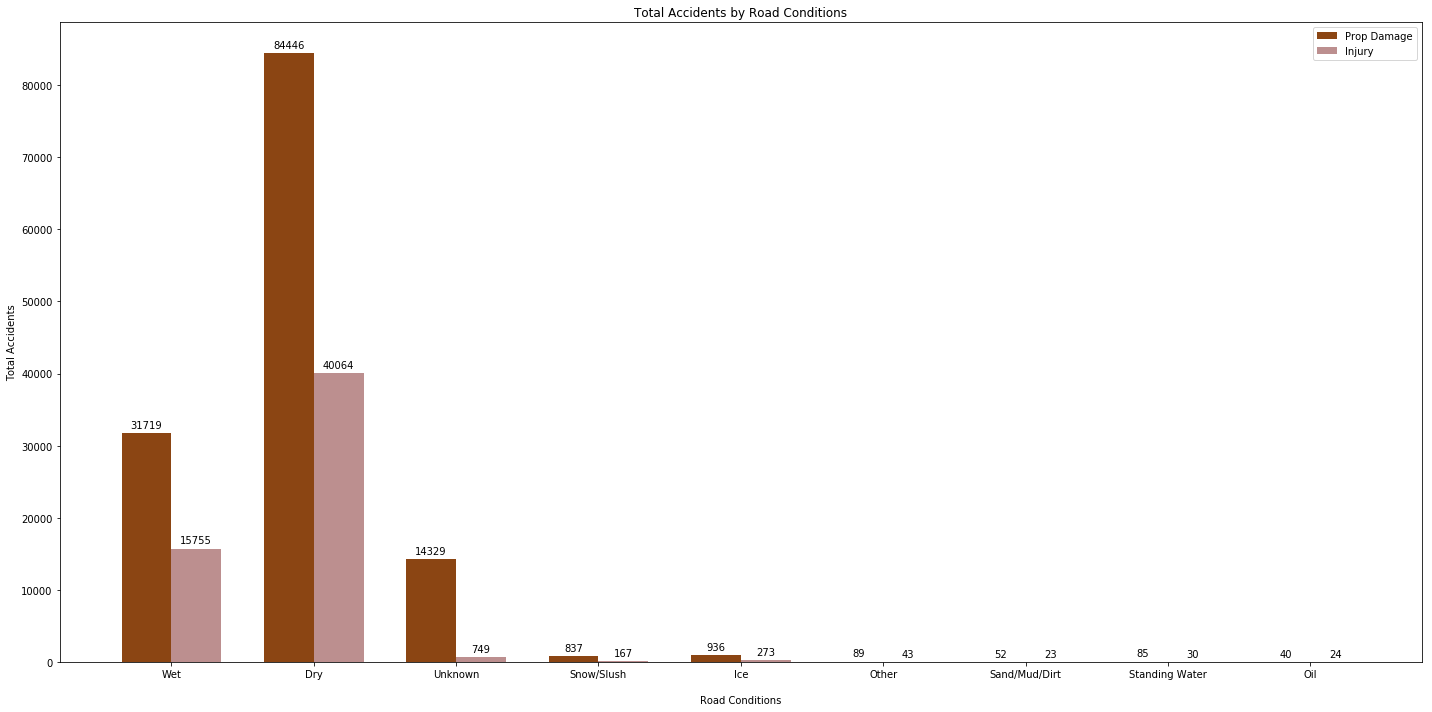

In [17]:
wet = df.loc[df['ROADCOND'] == 'Wet', 'SEVERITYCODE'].value_counts()
dry = df.loc[df['ROADCOND'] == 'Dry', 'SEVERITYCODE'].value_counts()
unknown2 = df.loc[df['ROADCOND'] == 'Unknown', 'SEVERITYCODE'].value_counts()
snow = df.loc[df['ROADCOND'] == 'Snow/Slush', 'SEVERITYCODE'].value_counts()
ice = df.loc[df['ROADCOND'] == 'Ice', 'SEVERITYCODE'].value_counts()
other2 = df.loc[df['ROADCOND'] == 'Other', 'SEVERITYCODE'].value_counts()
sand2 = df.loc[df['ROADCOND'] == 'Sand/Mud/Dirt', 'SEVERITYCODE'].value_counts()
water = df.loc[df['ROADCOND'] == 'Standing Water', 'SEVERITYCODE'].value_counts()
oil = df.loc[df['ROADCOND'] == 'Oil', 'SEVERITYCODE'].value_counts()

roadcond_names = ['Wet','Dry','Unknown','Snow/Slush','Ice','Other', 'Sand/Mud/Dirt', 
                   'Standing Water', 'Oil']

labels = roadcond_names
roadcond_1 = [wet[1],dry[1],unknown2[1],snow[1],ice[1],other2[1],sand2[1],water[1],oil[1]]
roadcond_2 = [wet[2],dry[2],unknown2[2],snow[2],ice[2],other2[2],sand2[2],water[2],oil[2]]

x = np.arange(len(labels))  
width = 0.35 

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, roadcond_1, width, color='#8B4513',label='Prop Damage')
rects2 = ax.bar(x + width/2, roadcond_2, width, color='#BC8F8F',label='Injury')


ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nRoad Conditions')
ax.set_title('Total Accidents by Road Conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

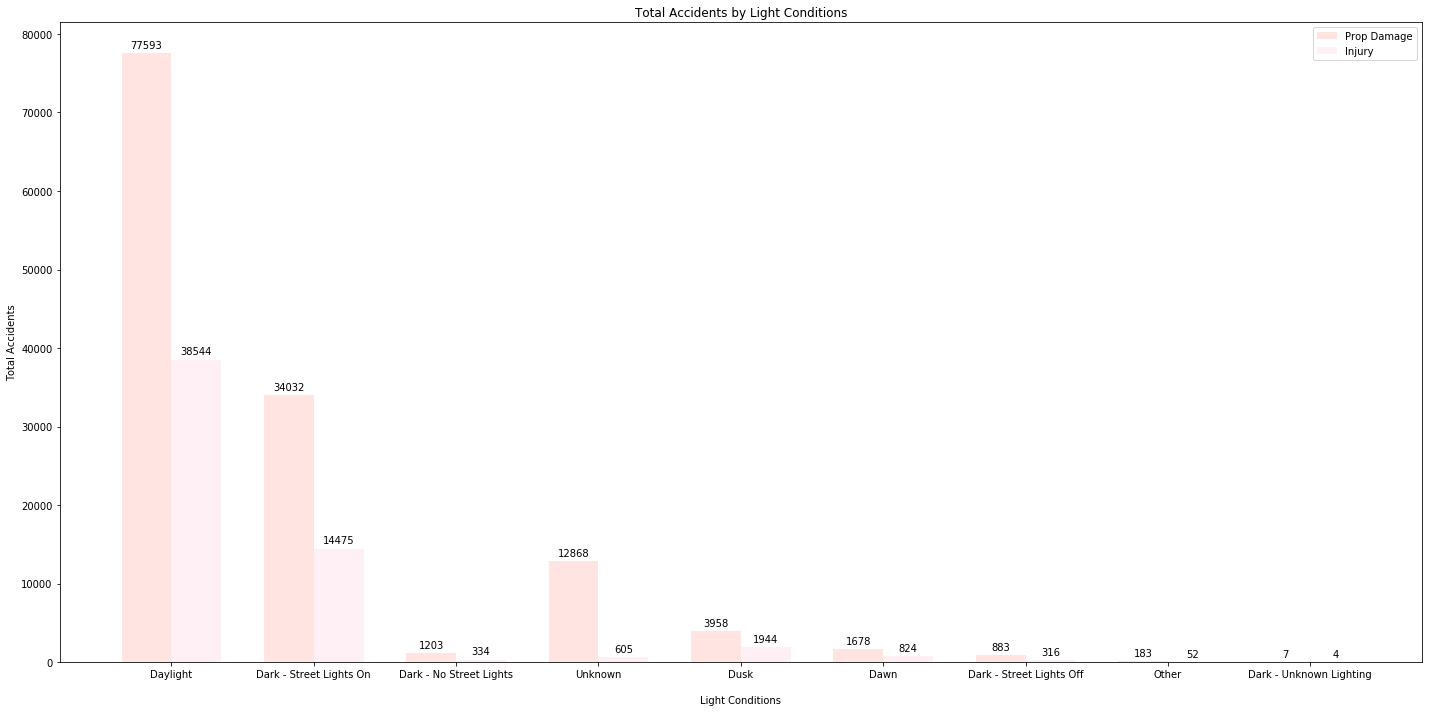

In [18]:
day = df.loc[df['LIGHTCOND'] == 'Daylight', 'SEVERITYCODE'].value_counts()
darkslon = df.loc[df['LIGHTCOND'] == 'Dark - Street Lights On', 'SEVERITYCODE'].value_counts()
darknsl = df.loc[df['LIGHTCOND'] == 'Dark - No Street Lights', 'SEVERITYCODE'].value_counts()
unknown3 = df.loc[df['LIGHTCOND'] == 'Unknown', 'SEVERITYCODE'].value_counts()
dusk = df.loc[df['LIGHTCOND'] == 'Dusk', 'SEVERITYCODE'].value_counts()
dawn = df.loc[df['LIGHTCOND'] == 'Dawn', 'SEVERITYCODE'].value_counts()
darksloff = df.loc[df['LIGHTCOND'] == 'Dark - Street Lights Off', 'SEVERITYCODE'].value_counts()
other3 = df.loc[df['LIGHTCOND'] == 'Other', 'SEVERITYCODE'].value_counts()
darkul = df.loc[df['LIGHTCOND'] == 'Dark - Unknown Lighting', 'SEVERITYCODE'].value_counts()

lightcond_names = ['Daylight','Dark - Street Lights On','Dark - No Street Lights','Unknown','Dusk','Dawn', 'Dark - Street Lights Off', 
                   'Other', 'Dark - Unknown Lighting']

labels = lightcond_names
lightcond_1 = [day[1],darkslon[1],darknsl[1],unknown3[1],dusk[1],dawn[1],darksloff[1],other3[1],darkul[1]]
lightcond_2 = [day[2],darkslon[2],darknsl[2],unknown3[2],dusk[2],dawn[2],darksloff[2],other3[2],darkul[2]]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, lightcond_1, width, color='#FFE4E1',label='Prop Damage')
rects2 = ax.bar(x + width/2, lightcond_2, width, color='#FFF0F5',label='Injury')


ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nLight Conditions')
ax.set_title('Total Accidents by Light Conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [19]:
df = df.dropna()

In [20]:
df = df.drop(['INATTENTIONIND', 'SPEEDING'], axis=1)


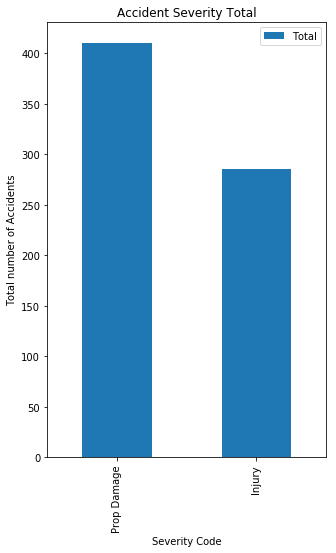

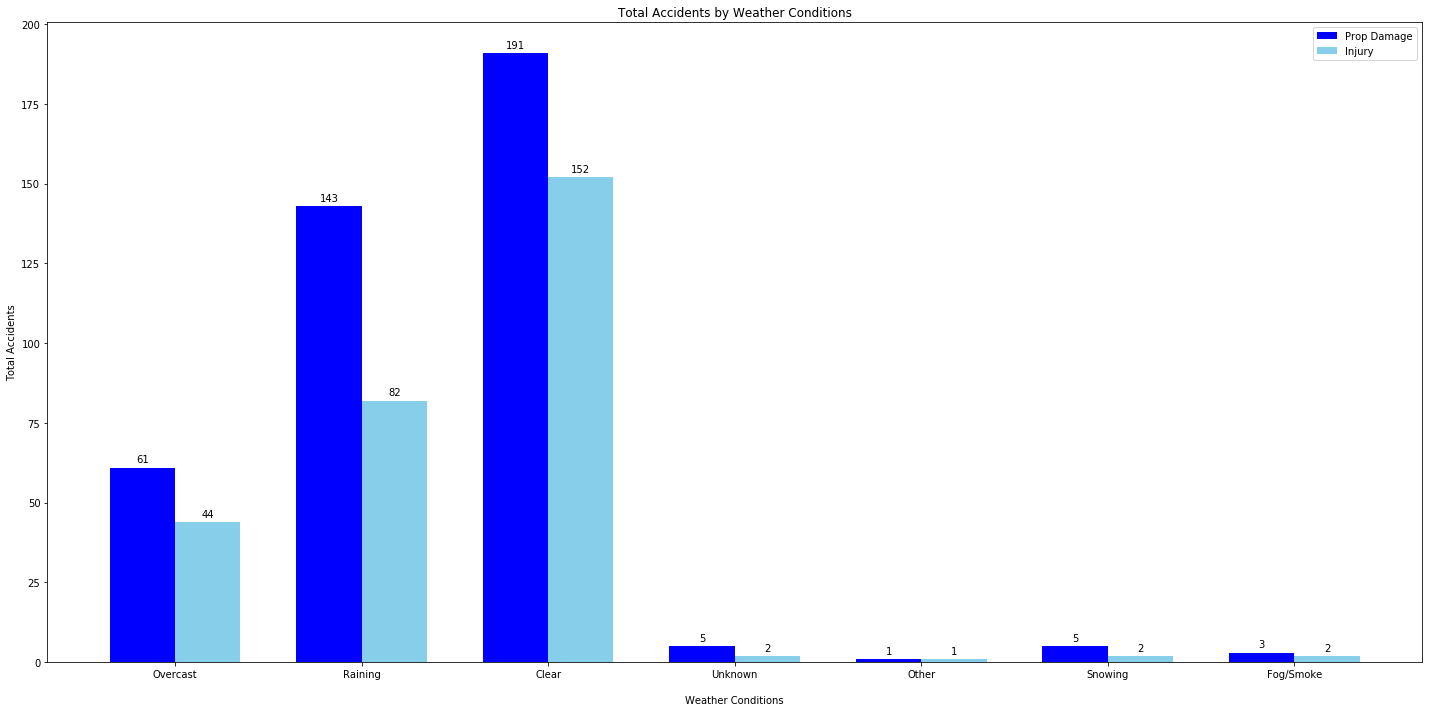

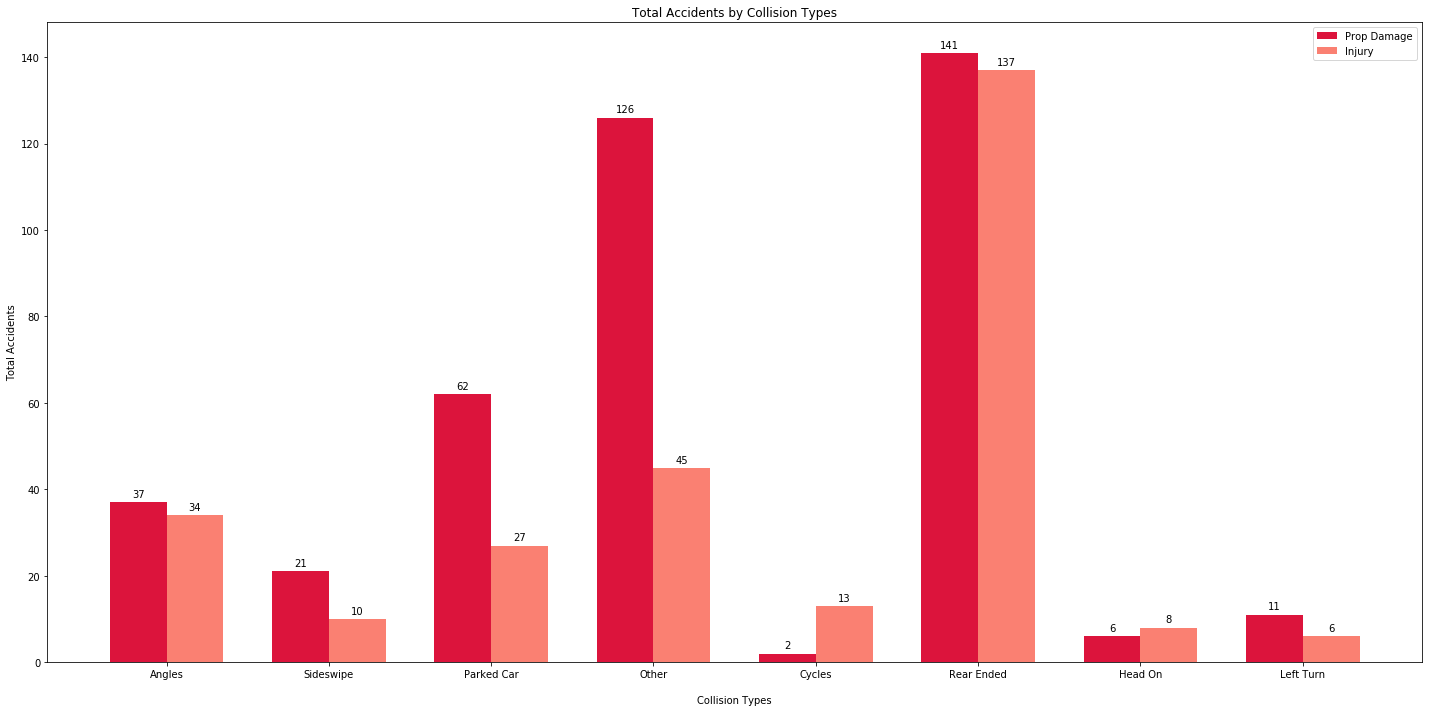

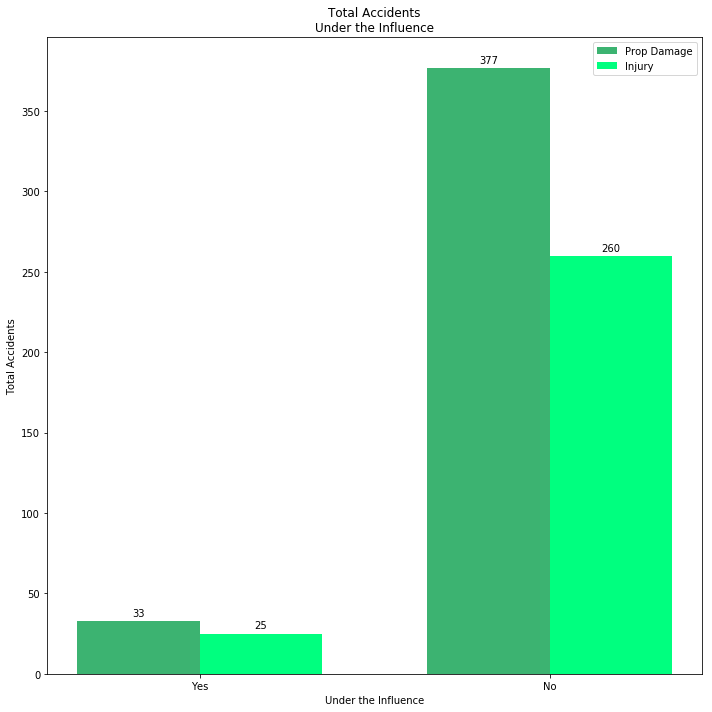

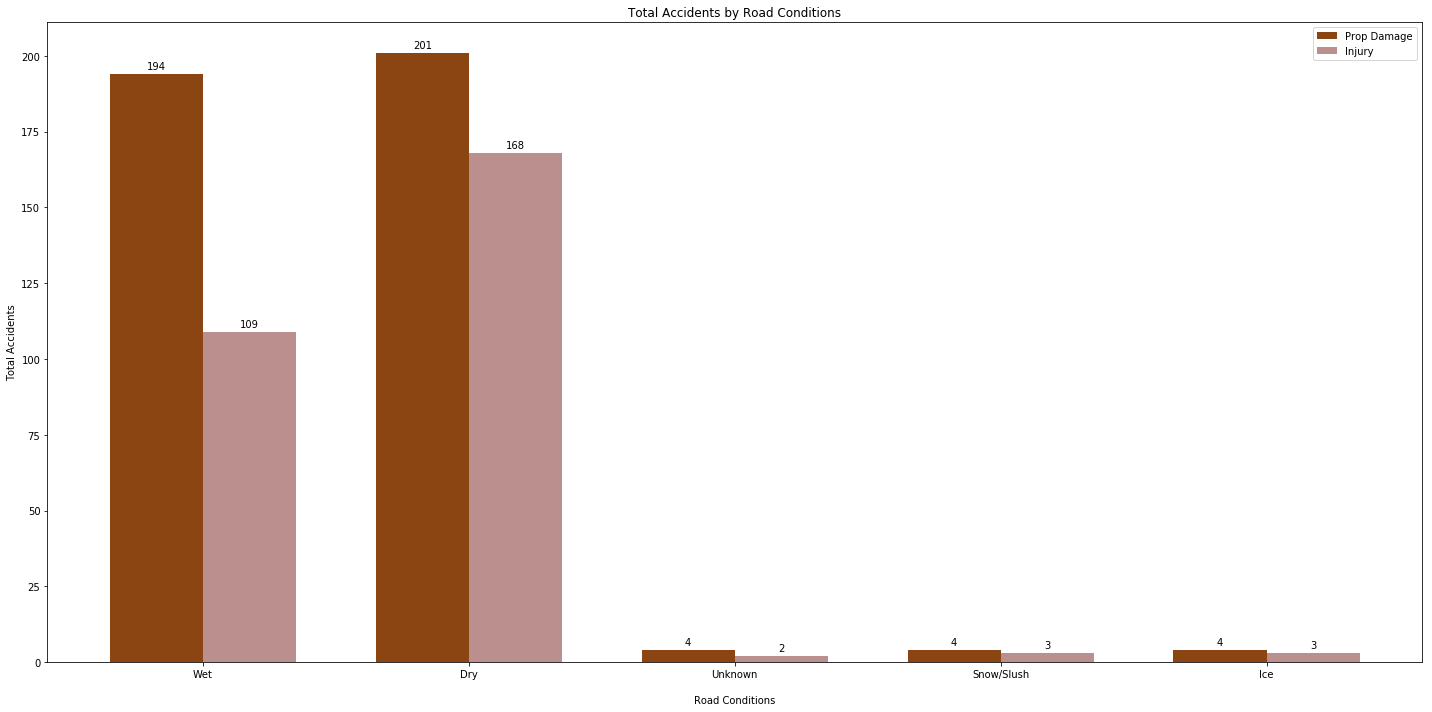

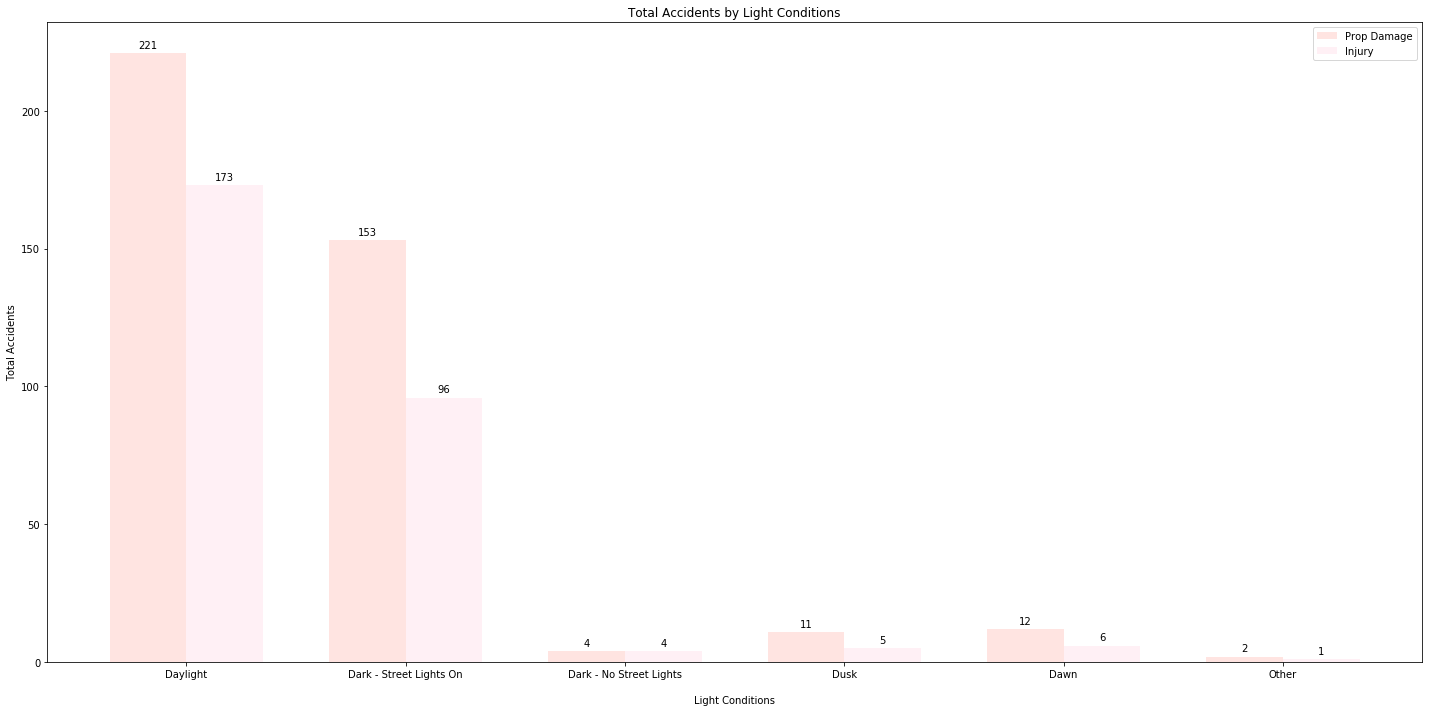

In [21]:
sc_total = {'SC': ['Prop Damage','Injury'], 'Total': [df[df['SEVERITYCODE'] == 1].shape[0], df[df['SEVERITYCODE'] == 2].shape[0]]}
sc_df = pd.DataFrame(data=sc_total)
sc_df.plot(kind='bar', x='SC', y='Total', figsize=(5, 8))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Total number of Accidents') # add y-label to the plot
plt.title('Accident Severity Total') # add title to the plot

plt.show()

##########################

overcast = df.loc[df['WEATHER'] == 'Overcast', 'SEVERITYCODE'].value_counts()
raining = df.loc[df['WEATHER'] == 'Raining', 'SEVERITYCODE'].value_counts()
clear = df.loc[df['WEATHER'] == 'Clear', 'SEVERITYCODE'].value_counts()
unknown = df.loc[df['WEATHER'] == 'Unknown', 'SEVERITYCODE'].value_counts()
other = df.loc[df['WEATHER'] == 'Other', 'SEVERITYCODE'].value_counts()
snowing = df.loc[df['WEATHER'] == 'Snowing', 'SEVERITYCODE'].value_counts()
fog = df.loc[df['WEATHER'] == 'Fog/Smog/Smoke', 'SEVERITYCODE'].value_counts()

weather_names = ['Overcast','Raining','Clear','Unknown','Other','Snowing','Fog/Smoke']

labels = weather_names
weather_1 = [overcast[1],raining[1],clear[1],unknown[1],other[1],snowing[1],fog[1]]
weather_2 = [overcast[2],raining[2],clear[2],unknown[2],other[2],snowing[2],fog[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, weather_1, width, color='Blue',label='Prop Damage')
rects2 = ax.bar(x + width/2, weather_2, width, color='SkyBlue',label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nWeather Conditions')
ax.set_title('Total Accidents by Weather Conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

################

angles = df.loc[df['COLLISIONTYPE'] == 'Angles', 'SEVERITYCODE'].value_counts()
sswipe = df.loc[df['COLLISIONTYPE'] == 'Sideswipe', 'SEVERITYCODE'].value_counts()
pcar = df.loc[df['COLLISIONTYPE'] == 'Parked Car', 'SEVERITYCODE'].value_counts()
other1 = df.loc[df['COLLISIONTYPE'] == 'Other', 'SEVERITYCODE'].value_counts()
cycles = df.loc[df['COLLISIONTYPE'] == 'Cycles', 'SEVERITYCODE'].value_counts()
rended = df.loc[df['COLLISIONTYPE'] == 'Rear Ended', 'SEVERITYCODE'].value_counts()
hon = df.loc[df['COLLISIONTYPE'] == 'Head On', 'SEVERITYCODE'].value_counts()
lturn = df.loc[df['COLLISIONTYPE'] == 'Left Turn', 'SEVERITYCODE'].value_counts()

collision_names = ['Angles','Sideswipe','Parked Car','Other','Cycles','Rear Ended', 'Head On', 
                   'Left Turn']

labels = collision_names
collision_1 = [angles[1],sswipe[1],pcar[1],other1[1],cycles[1],rended[1],hon[1],lturn[1]]
collision_2 = [angles[2],sswipe[2],pcar[2],other1[2],cycles[2],rended[2],hon[2],lturn[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, collision_1, width, color='#DC143C',label='Prop Damage')
rects2 = ax.bar(x + width/2, collision_2, width, color='#FA8072',label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nCollision Types')
ax.set_title('Total Accidents by Collision Types')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

##################

no = df.loc[df['UNDERINFL'] == 'N', 'SEVERITYCODE'].value_counts()
yes = df.loc[df['UNDERINFL'] == 'Y', 'SEVERITYCODE'].value_counts()

underinfl_names = ['Yes','No']

labels = underinfl_names
underinfl_1 = [yes[1],no[1]]
underinfl_2 = [yes[2],no[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 10))
rects1 = ax.bar(x - width/2, underinfl_1, width, color='#3CB371',label='Prop Damage')
rects2 = ax.bar(x + width/2, underinfl_2, width, color='#00FF7F',label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Accidents')
ax.set_xlabel('Under the Influence')
ax.set_title('Total Accidents\nUnder the Influence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

##################

wet = df.loc[df['ROADCOND'] == 'Wet', 'SEVERITYCODE'].value_counts()
dry = df.loc[df['ROADCOND'] == 'Dry', 'SEVERITYCODE'].value_counts()
unknown2 = df.loc[df['ROADCOND'] == 'Unknown', 'SEVERITYCODE'].value_counts()
snow = df.loc[df['ROADCOND'] == 'Snow/Slush', 'SEVERITYCODE'].value_counts()
ice = df.loc[df['ROADCOND'] == 'Ice', 'SEVERITYCODE'].value_counts()

roadcond_names = ['Wet','Dry','Unknown','Snow/Slush','Ice']

labels = roadcond_names
roadcond_1 = [wet[1],dry[1],unknown2[1],snow[1],ice[1]]
roadcond_2 = [wet[2],dry[2],unknown2[2],snow[2],ice[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, roadcond_1, width, color='#8B4513',label='Prop Damage')
rects2 = ax.bar(x + width/2, roadcond_2, width, color='#BC8F8F',label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nRoad Conditions')
ax.set_title('Total Accidents by Road Conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#################

day = df.loc[df['LIGHTCOND'] == 'Daylight', 'SEVERITYCODE'].value_counts()
darkslon = df.loc[df['LIGHTCOND'] == 'Dark - Street Lights On', 'SEVERITYCODE'].value_counts()
darknsl = df.loc[df['LIGHTCOND'] == 'Dark - No Street Lights', 'SEVERITYCODE'].value_counts()
dusk = df.loc[df['LIGHTCOND'] == 'Dusk', 'SEVERITYCODE'].value_counts()
dawn = df.loc[df['LIGHTCOND'] == 'Dawn', 'SEVERITYCODE'].value_counts()
other3 = df.loc[df['LIGHTCOND'] == 'Other', 'SEVERITYCODE'].value_counts()

lightcond_names = ['Daylight','Dark - Street Lights On','Dark - No Street Lights','Dusk','Dawn', 
                   'Other']
labels = lightcond_names
lightcond_1 = [day[1],darkslon[1],darknsl[1],dusk[1],dawn[1],other3[1]]
lightcond_2 = [day[2],darkslon[2],darknsl[2],dusk[2],dawn[2],other3[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, lightcond_1, width, color='#FFE4E1',label='Prop Damage')
rects2 = ax.bar(x + width/2, lightcond_2, width, color='#FFF0F5',label='Injury')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Accidents')
ax.set_xlabel('\nLight Conditions')
ax.set_title('Total Accidents by Light Conditions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [22]:

df['SEVERITYCODE'].value_counts()

1    410
2    285
Name: SEVERITYCODE, dtype: int64

In [23]:
from sklearn.utils import resample
df_maj = df[df['SEVERITYCODE'] == 1]
df_min = df[df['SEVERITYCODE'] == 2]
df_min_ds = resample(df_maj, replace=False, n_samples=285, random_state=123)
df_tr = pd.concat([df_min_ds, df_min])

In [24]:
df_tr['SEVERITYCODE'].value_counts()

2    285
1    285
Name: SEVERITYCODE, dtype: int64

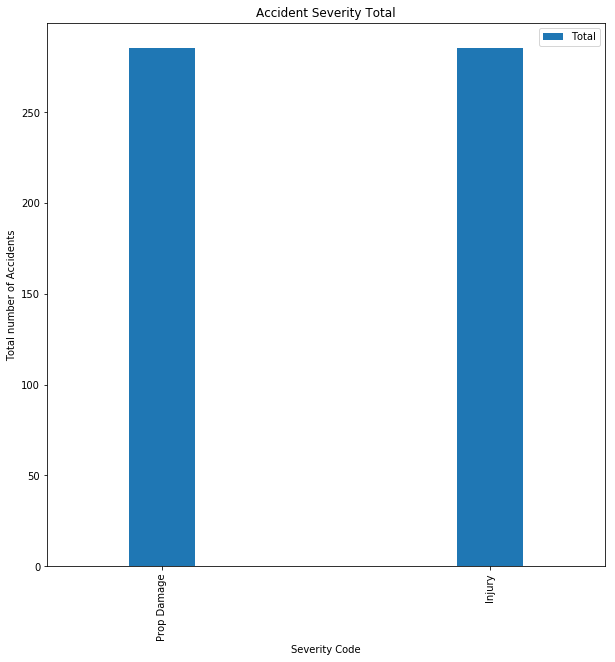

In [25]:
sc_total = {'SC': ['Prop Damage','Injury'], 'Total': [df_tr[df_tr['SEVERITYCODE'] == 1].shape[0], df_tr[df_tr['SEVERITYCODE'] == 2].shape[0]]}
sc_df = pd.DataFrame(data=sc_total)
sc_df.plot(kind='bar', width=0.20,x='SC', y='Total', figsize=(10, 10))

plt.xlabel('Severity Code') # add to x-label to the plot
plt.ylabel('Total number of Accidents') # add y-label to the plot
plt.title('Accident Severity Total') # add title to the plot

plt.show()

In [27]:
df_tr.head()

,SEVERITYCODE,COLLISIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
11657,1,Parked Car,N,Clear,Dry,Daylight
20012,1,Sideswipe,N,Clear,Dry,Daylight
66649,1,Other,N,Clear,Wet,Daylight
120972,1,Head On,N,Raining,Wet,Daylight
143764,1,Other,N,Clear,Dry,Dark - Street Lights On


In [28]:
df_tr['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df_tr['COLLISIONTYPE'].replace(to_replace=['Other'], value=['CT_Other'],inplace=True)
df_tr['WEATHER'].replace(to_replace=['Other'], value=['W_Other'],inplace=True)
df_tr['WEATHER'].replace(to_replace=['Unknown'], value=['W_Unknown'],inplace=True)
df_tr['ROADCOND'].replace(to_replace=['Unknown'], value=['RC_Unknown'],inplace=True)
df_tr['LIGHTCOND'].replace(to_replace=['Other'], value=['LC_Other'],inplace=True)
df_tr['LIGHTCOND'].replace(to_replace=['Unknown'], value=['LC_Unknown'],inplace=True)


In [29]:
df_tr.head()

,SEVERITYCODE,COLLISIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
11657,1,Parked Car,0,Clear,Dry,Daylight
20012,1,Sideswipe,0,Clear,Dry,Daylight
66649,1,CT_Other,0,Clear,Wet,Daylight
120972,1,Head On,0,Raining,Wet,Daylight
143764,1,CT_Other,0,Clear,Dry,Dark - Street Lights On


In [30]:
df_test = df_tr[['SEVERITYCODE','COLLISIONTYPE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND']]
df_test = pd.concat([df_test,pd.get_dummies(df_tr['COLLISIONTYPE'])], axis=1)
df_test.drop(['COLLISIONTYPE'], axis = 1,inplace=True)
df_test = pd.concat([df_test,pd.get_dummies(df_tr['WEATHER'])], axis=1)
df_test.drop(['WEATHER'], axis = 1,inplace=True)
df_test = pd.concat([df_test,pd.get_dummies(df_tr['ROADCOND'])], axis=1)
df_test.drop(['ROADCOND'], axis = 1,inplace=True)
df_test = pd.concat([df_test,pd.get_dummies(df_tr['LIGHTCOND'])], axis=1)
df_test.drop(['LIGHTCOND'], axis = 1,inplace=True)


In [31]:
df_test.head()

,SEVERITYCODE,UNDERINFL,Angles,CT_Other,Cycles,Head On,Left Turn,Parked Car,Pedestrian,Rear Ended,...,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,LC_Other,LC_Unknown
11657,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20012,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
66649,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
120972,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
143764,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
X = df_test

In [33]:
y = df_tr['SEVERITYCODE'].values

In [34]:
X= preprocessing.StandardScaler().fit(X).transform(X)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [35]:
# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4 )
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (399, 34) (399,)
Test set: (171, 34) (171,)


In [37]:
# K Nearest Neighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier


In [39]:
k=25
neighK25 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighK25

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [40]:
yhat = neighK25.predict(X_test)
yhat[0:5]

array([2, 2, 2, 2, 1])

In [41]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighK25.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8596491228070176
Test set Accuracy:  0.8011695906432749


In [42]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.87719298, 0.85964912, 0.86549708, 0.84795322, 0.85964912,
       0.88304094, 0.88304094, 0.81871345, 0.8245614 , 0.84210526,
       0.8245614 , 0.8128655 , 0.81871345, 0.81871345, 0.79532164,
       0.78362573, 0.80701754, 0.8128655 , 0.8128655 , 0.78947368,
       0.78362573, 0.79532164, 0.8128655 , 0.80701754, 0.80116959,
       0.84210526, 0.85380117, 0.87134503, 0.88888889, 0.88304094,
       0.90643275, 0.88888889, 0.87719298, 0.91812865, 0.9122807 ,
       0.92397661, 0.91812865, 0.90643275, 0.9005848 , 0.9005848 ,
       0.84795322, 0.84795322, 0.85380117, 0.84795322, 0.83040936,
       0.81871345, 0.83040936, 0.8245614 , 0.83625731, 0.83625731,
       0.83625731, 0.84210526, 0.84210526, 0.85380117, 0.85380117,
       0.85380117, 0.84210526, 0.88888889, 0.88888889, 0.88888889,
       0.84795322, 0.87719298, 0.87719298, 0.88304094, 0.86549708,
       0.87719298, 0.87719298, 0.87719298, 0.88304094, 0.88304094,
       0.89473684, 0.89473684, 0.89473684, 0.87134503, 0.87719

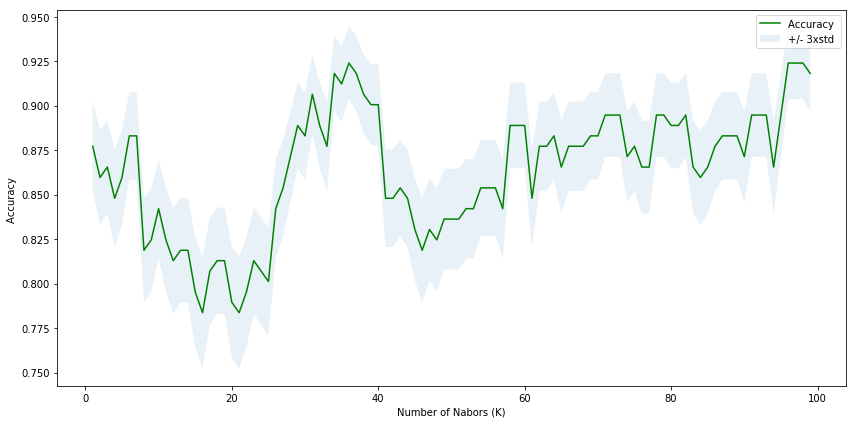

Best Accuracy: 0.9239766081871345 , K = 36


In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "Best Accuracy:", mean_acc.max(), ", K =", mean_acc.argmax()+1)

In [44]:
# Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
predTree = Tree.predict(X_testset)
print (predTree [0:5])
print (y_testset [0:5])

[1 2 2 2 2]
[1 2 2 2 2]


In [48]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Accuracy:  1.0


In [49]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    openssl-1.1.1h             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-pyhd1c1de3_3 conda-forge
    python_abi:      3.6-1_cp36m        conda-forge

The following packages will be UPDATED:

 

In [52]:
df_tr.dtypes

SEVERITYCODE      int64
COLLISIONTYPE    object
UNDERINFL         int64
WEATHER          object
ROADCOND         object
LIGHTCOND        object
dtype: object

In [53]:
#Support Vectore Machines (SVM)

In [54]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 1, 2, 2, 1])

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

           1       0.93      0.99      0.96        79
           2       0.99      0.93      0.96        92

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



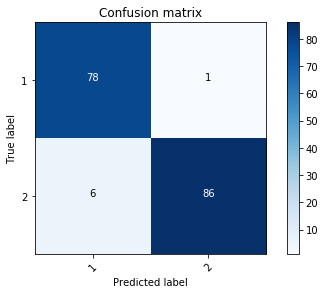

In [58]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')


0.9591204479535771

In [60]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9590643274853801

In [61]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.  , -0.3 , -0.34, -0.56, -0.16, -0.14, -0.16,  2.63, -0.09,
        -0.83, -0.04, -0.21,  0.99, -0.08, -0.42, -0.67, -0.04, -0.1 ,
        -0.06, -0.09,  0.91, -0.1 , -0.09, -0.1 , -0.07, -0.85, -0.1 ,
        -0.06, -0.74, -0.17,  0.85, -0.13, -0.06, -0.08],
       [-1.  , -0.3 , -0.34, -0.56, -0.16, -0.14, -0.16, -0.38, -0.09,
        -0.83, -0.04,  4.77,  0.99, -0.08, -0.42, -0.67, -0.04, -0.1 ,
        -0.06, -0.09,  0.91, -0.1 , -0.09, -0.1 , -0.07, -0.85, -0.1 ,
        -0.06, -0.74, -0.17,  0.85, -0.13, -0.06, -0.08],
       [-1.  , -0.3 , -0.34,  1.78, -0.16, -0.14, -0.16, -0.38, -0.09,
        -0.83, -0.04, -0.21,  0.99, -0.08, -0.42, -0.67, -0.04, -0.1 ,
        -0.06, -0.09, -1.1 , -0.1 , -0.09, -0.1 , -0.07,  1.18, -0.1 ,
        -0.06, -0.74, -0.17,  0.85, -0.13, -0.06, -0.08],
       [-1.  , -0.3 , -0.34, -0.56, -0.16,  7.13, -0.16, -0.38, -0.09,
        -0.83, -0.04, -0.21, -1.01, -0.08, -0.42,  1.49, -0.04, -0.1 ,
        -0.06, -0.09, -1.1 , -0.1 , -0.09, -0

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (399, 34) (399,)
Test set: (171, 34) (171,)


In [63]:
#Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [66]:
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
yhat = LogR.predict(X_test)
yhat

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2])

In [70]:
yhat_prob = LogR.predict_proba(X_test)
yhat_prob

array([[0.24, 0.76],
       [0.4 , 0.6 ],
       [0.23, 0.77],
       [0.23, 0.77],
       [0.67, 0.33],
       [0.8 , 0.2 ],
       [0.7 , 0.3 ],
       [0.69, 0.31],
       [0.71, 0.29],
       [0.68, 0.32],
       [0.81, 0.19],
       [0.23, 0.77],
       [0.23, 0.77],
       [0.24, 0.76],
       [0.23, 0.77],
       [0.24, 0.76],
       [0.23, 0.77],
       [0.21, 0.79],
       [0.83, 0.17],
       [0.22, 0.78],
       [0.26, 0.74],
       [0.23, 0.77],
       [0.68, 0.32],
       [0.76, 0.24],
       [0.29, 0.71],
       [0.23, 0.77],
       [0.71, 0.29],
       [0.7 , 0.3 ],
       [0.76, 0.24],
       [0.24, 0.76],
       [0.24, 0.76],
       [0.35, 0.65],
       [0.68, 0.32],
       [0.22, 0.78],
       [0.37, 0.63],
       [0.23, 0.77],
       [0.71, 0.29],
       [0.63, 0.37],
       [0.23, 0.77],
       [0.8 , 0.2 ],
       [0.36, 0.64],
       [0.76, 0.24],
       [0.23, 0.77],
       [0.36, 0.64],
       [0.24, 0.76],
       [0.19, 0.81],
       [0.19, 0.81],
       [0.24,

In [71]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

In [72]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.3100151976231949

In [73]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [74]:
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_similarity_score(y, yhatKNN)
KNNF1 = f1_score(y, yhatKNN, average='weighted')
print("Avg F1-Score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

Avg F1-Score: 0.94
KNN Jaccard Score: 0.94


In [75]:
yhatDEC = Tree.predict(X)
DTJaccard = jaccard_similarity_score(y, yhatDEC)
DTF1 = f1_score(y, yhatDEC, average='weighted')
print("Avg F1-Score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

Avg F1-Score: 1.00
Decision Tree Jaccard Score: 1.00


In [76]:
yhatSVM=clf.predict(X)
SVMJaccard = jaccard_similarity_score(y, yhatSVM)
SVMF1 = f1_score(y, yhatSVM, average='weighted')
print("Avg F1-Score: %.2f" % SVMF1)
print("SVM Jaccard Score: %.2f" % SVMJaccard)

Avg F1-Score: 0.98
SVM Jaccard Score: 0.98


In [77]:
yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRJaccard = jaccard_similarity_score(y, yhatLOG)
LogRF1 = f1_score(y, yhatLOG, average='weighted')
Logloss = log_loss(y, yhatLOGproba)
print("Log Loss: : %.2f" % Logloss)
print("Avg F1-Score: %.4f" % LogRF1)
print("LOG Jaccard Score: %.4f" % LogRJaccard)

Log Loss: : 0.30
Avg F1-Score: 1.0000
LOG Jaccard Score: 1.0000
